<a href="https://colab.research.google.com/github/lorraine-mwoyounotsva/CODSOFT/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **TASK 1:**
# **TITANIC SURVIVAL PREDICTION**

### The aim of this project is  to create a predictive model that determines whether a passenger aboard the Titanic survived the tragic event or not. This project analyzes information about individual passengers, such as their age, gender, ticket class, fare, cabin, and whether or not they survived.


In [218]:
#Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [219]:
#Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Full-stack developer /tested.csv')

#Display the first few rows of the dataset
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### **Data Analysis**

In [220]:
# Explore the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [221]:
#Checking the shape of the dataset
df.shape

(418, 12)

In [222]:
#To check number column in dataframe df1
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [223]:
# Checking for null/missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [224]:
# Impute missing values for 'Age' using the median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Impute missing values for 'Embarked' using the mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [225]:
# Checking the datatypes
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [226]:
#Descriptive Statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,29.599282,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.703770,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [227]:
# Normalize numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

In [228]:
# Calculate passenger demographics
total_passengers = len(df)
average_age = df["Age"].mean()
male_passengers = len(df[df["Sex"] == "male"])
female_passengers = len(df[df["Sex"] == "female"])
passengers_first_class = len(df[df["Pclass"] == 1])
passengers_second_class = len(df[df["Pclass"] == 2])
passengers_third_class = len(df[df["Pclass"] == 3])

# Display passenger demographics
print("Total Passengers:", total_passengers)
print("Average Age:", average_age)
print("Male Passengers:", male_passengers)
print("Female Passengers:", female_passengers)
print("Passengers in First Class:", passengers_first_class)
print("Passengers in Second Class:", passengers_second_class)
print("Passengers in Third Class:", passengers_third_class)

Total Passengers: 418
Average Age: 5.5245547636849893e-17
Male Passengers: 266
Female Passengers: 152
Passengers in First Class: 107
Passengers in Second Class: 93
Passengers in Third Class: 218


In [229]:
#Correlation analysis
df.corr()

<ipython-input-229-aa4db09c6143>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.023245,-0.026751,-0.031447,0.003818,0.043080,0.008211
Survived,-0.023245,1.000000,-0.108615,0.008035,0.099943,0.159120,0.191514
Pclass,-0.026751,-0.108615,1.000000,-0.467853,0.001087,0.018721,-0.577147
Age,-0.031447,0.008035,-0.467853,1.000000,-0.071197,-0.043731,0.347105
SibSp,0.003818,0.099943,0.001087,-0.071197,1.000000,0.306895,0.171539
Parch,0.043080,0.159120,0.018721,-0.043731,0.306895,1.000000,0.230046
Fare,0.008211,0.191514,-0.577147,0.347105,0.171539,0.230046,1.000000


### **DATA VISUALIZATION**

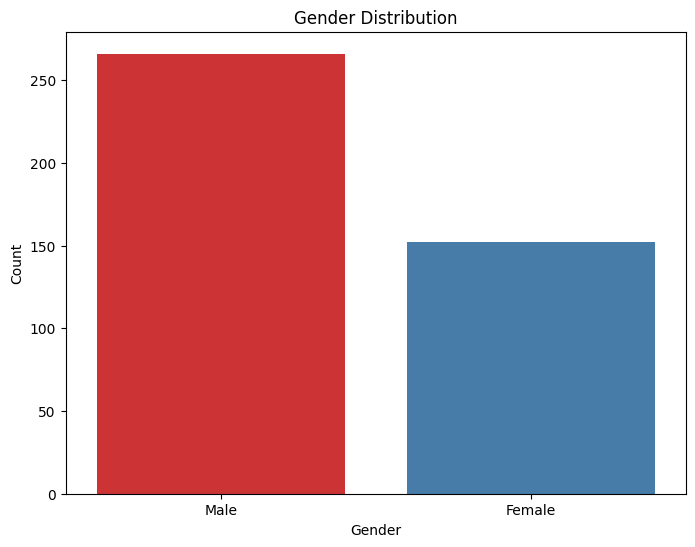

Number of Male Passengers: 266
Number of Female Passengers: 152


In [230]:
#Gender distribution
# Filter the dataset for male and female passengers
male_passengers = df[df['Sex'] == 'male']
female_passengers = df[df['Sex'] == 'female']

# Count the number of male and female passengers
male_count = len(male_passengers)
female_count = len(female_passengers)

#Create a bar plot to visualize the gender distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=['Male', 'Female'], y=[male_count, female_count], palette='Set1')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

print(f"Number of Male Passengers: {male_count}")
print(f"Number of Female Passengers: {female_count}")

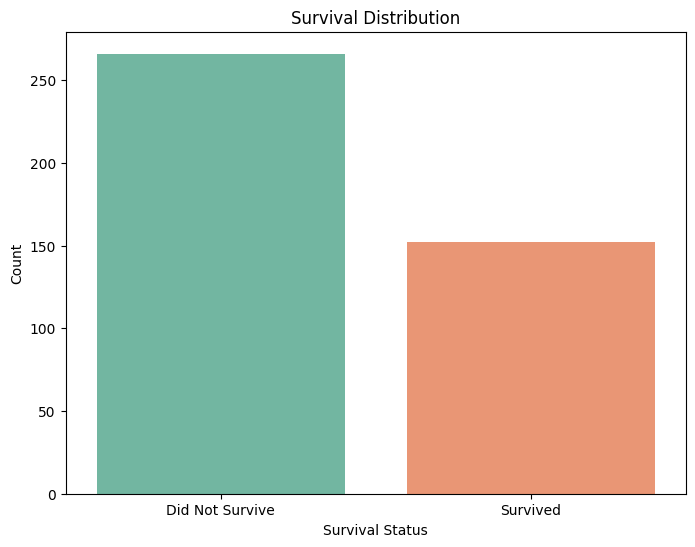

Number of Passengers Who Did Not Survive: 266
Number of Passengers Who Survived: 152


In [231]:
#Survival distribution

# Filter the dataset for passengers who did not survive (Survived = 0) and those who survived (Survived = 1)
not_survived_passengers = df[df['Survived'] == 0]
survived_passengers = df[df['Survived'] == 1]

# Count the number of passengers in each category
not_survived_count = len(not_survived_passengers)
survived_count = len(survived_passengers)

# Create a bar plot to visualize the survival distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=['Did Not Survive', 'Survived'], y=[not_survived_count, survived_count], palette='Set2')
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.title('Survival Distribution')
plt.show()

print(f"Number of Passengers Who Did Not Survive: {not_survived_count}")
print(f"Number of Passengers Who Survived: {survived_count}")

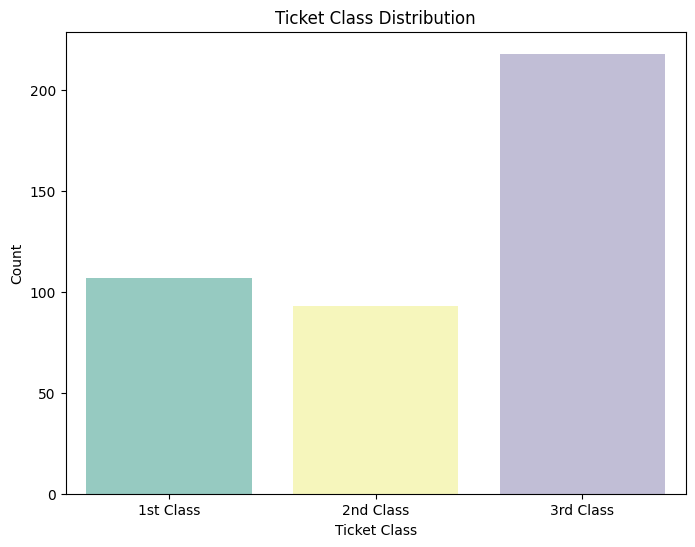

Number of Passengers in 1st Class: 107
Number of Passengers in 2nd Class: 93
Number of Passengers in 3rd Class: 218


In [232]:
#Ticket class distribution

# Count the number of passengers in each ticket class (1st, 2nd, and 3rd class)
class_1_count = len(df[df['Pclass'] == 1])
class_2_count = len(df[df['Pclass'] == 2])
class_3_count = len(df[df['Pclass'] == 3])

# Create a bar plot to visualize the ticket class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=['1st Class', '2nd Class', '3rd Class'], y=[class_1_count, class_2_count, class_3_count], palette='Set3')
plt.xlabel('Ticket Class')
plt.ylabel('Count')
plt.title('Ticket Class Distribution')
plt.show()

print(f"Number of Passengers in 1st Class: {class_1_count}")
print(f"Number of Passengers in 2nd Class: {class_2_count}")
print(f"Number of Passengers in 3rd Class: {class_3_count}")

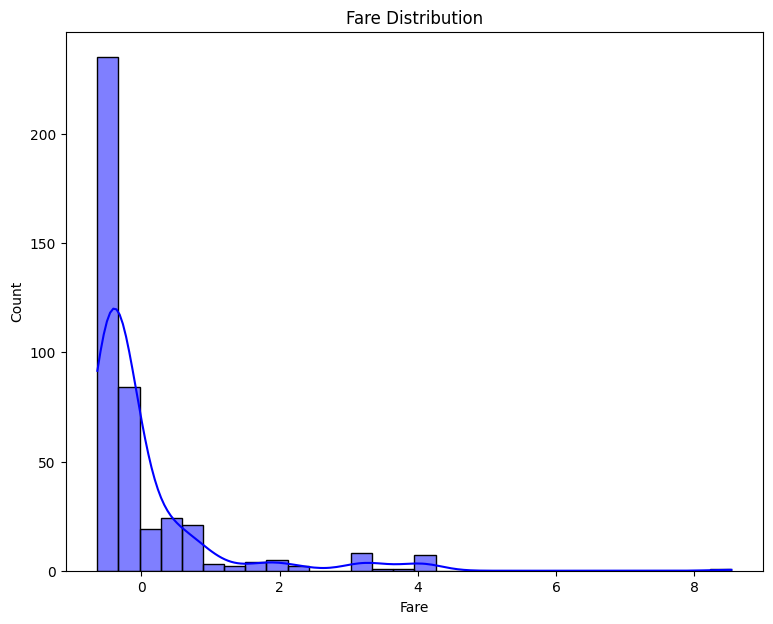

In [233]:
#Fare distribution
plt.figure(figsize=(9, 7))
sns.histplot(df['Fare'], bins=30, kde=True, color='blue')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Fare Distribution')
plt.show()

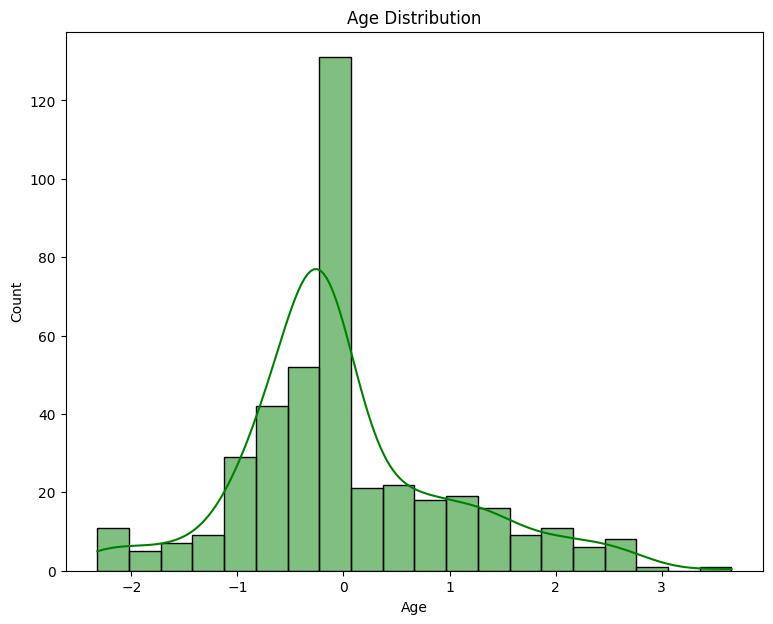

In [234]:
#Age distribution
plt.figure(figsize=(9, 7))
sns.histplot(df['Age'].dropna(), bins=20, kde=True, color='green')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

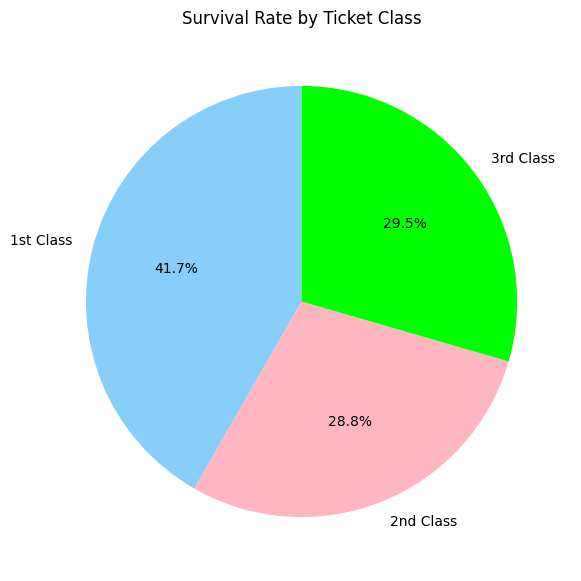

In [235]:
#Ticket class vs. Survival

# Group the data by ticket class and calculate the survival rate for each class
ticket_class_survival = df.groupby('Pclass')['Survived'].mean()

# Create a pie chart
plt.figure(figsize=(7, 7))
colors = ['lightskyblue', 'lightpink', 'lime']
labels = ['1st Class', '2nd Class', '3rd Class']
plt.pie(ticket_class_survival, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Survival Rate by Ticket Class')
plt.show()

<Figure size 900x700 with 0 Axes>

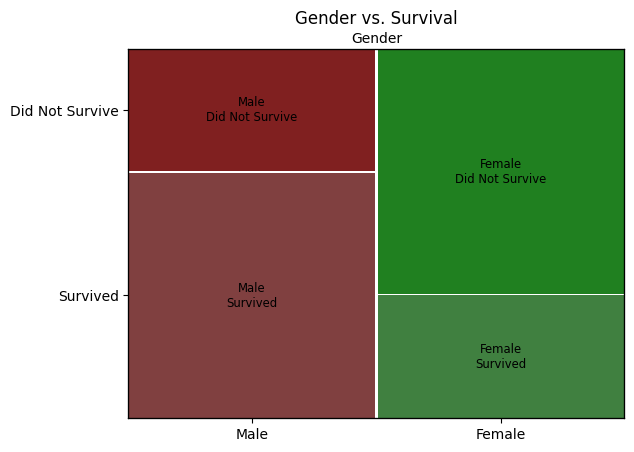

In [236]:
#Gender vs. Survival


# Sample data
data = pd.DataFrame({
    'Sex': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'Survived': ['Survived', 'Survived', 'Did Not Survive', 'Did Not Survive', 'Survived', 'Did Not Survive']
})

# Create a mosaic plot
plt.figure(figsize=(9, 7))
mosaic(data, ['Sex', 'Survived'], title='Gender vs. Survival')
plt.xlabel('Gender')
plt.ylabel('Survival')
plt.show()

### **TEST AND TRAIN MODEL**

In [237]:
#Feature Engineering
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

#Encode categorical variables
df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Title'], drop_first=True)

#Split the data into features (X) and target (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Create a pipeline for preprocessing and modeling
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('clf', HistGradientBoostingClassifier(random_state=42))
])

#Define hyperparameters for tuning
param_grid = {
    'clf__learning_rate': [0.01, 0.1, 0.2],
    'clf__max_iter': [100, 150, 200],
    'clf__max_depth': [3, 4, 5],
    'clf__min_samples_leaf': [1, 2, 3],
    'clf__l2_regularization': [0.0, 0.1, 0.2]
}

#Perform grid search cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

#Best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:")
print(best_params)

#Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

#Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{report}')

confusion = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{confusion}')


Best Hyperparameters:
{'clf__l2_regularization': 0.0, 'clf__learning_rate': 0.01, 'clf__max_depth': 3, 'clf__max_iter': 100, 'clf__min_samples_leaf': 1}
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

Confusion Matrix:
[[50  0]
 [ 0 34]]


### **CONCLUSION**

### To create a prediction model for Titanic passenger survival, the model goes through a number of processes, including data preparation, feature engineering, and hyperparameter tuning. The objective is to reliably estimate passenger survival outcomes based on factors such as age, gender, ticket class, and more. The model's performance is evaluated using multiple assessment criteria to determine its accuracy in making predictions.